In [160]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error ,r2_score, mean_squared_log_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from scipy.stats import norm, skew
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

In [171]:
dataset = pd.read_csv('../Data/train.csv')
dataset = dataset.drop('loan_enq',1)

In [172]:
dataframe = pd.read_csv('../Data/new_data_preprocessed_2.csv')

In [173]:
dataframe

,saving_account,current_acc,female,male,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,1.0,0.0,0.0,1.0,35.0,708,157.775156,19.442222,101.429779,172.232401,...,1.414214,40.0,156.725875,173.353166,112.964596,1.414214,65.0,225.468401,40.915645,141.470845
1,1.0,0.0,0.0,1.0,35.0,123,137.628558,31.080541,143.777606,16.941074,...,1.414214,78.0,154.751414,205.229262,152.400787,4.582576,63.0,152.400787,114.207443,100.861291
2,1.0,0.0,0.0,1.0,55.0,802,75.358278,52.191953,44.322680,62.714512,...,1.414214,82.0,103.691851,241.605567,164.426275,2.645751,1.0,164.426275,159.296171,126.866071
3,1.0,0.0,1.0,0.0,29.0,867,174.612428,35.156792,112.293722,95.593619,...,4.795832,38.0,112.280898,264.294362,207.453609,4.582576,83.0,207.453609,59.534276,87.789521
4,1.0,0.0,0.0,1.0,34.0,802,86.263550,83.102587,66.060578,44.034078,...,4.898979,50.0,158.786020,100.354372,179.008380,2.828427,32.0,179.008380,113.050608,310.496377
5,1.0,0.0,0.0,1.0,27.0,958,48.251632,39.969238,141.349744,32.339604,...,6.557439,2.0,146.424042,228.675928,131.468627,1.414214,35.0,131.468627,70.897814,360.919659
6,1.0,0.0,0.0,1.0,32.0,805,40.543927,70.775208,94.454328,46.378875,...,1.414214,25.0,142.982516,165.392140,82.334683,7.615773,12.0,82.334683,39.178183,336.866442
7,1.0,0.0,0.0,1.0,28.0,448,75.950642,44.305756,290.297485,44.226689,...,1.000000,63.0,73.979727,228.936520,86.151030,2.236068,58.0,238.537209,121.200495,86.388657
8,1.0,0.0,1.0,0.0,67.0,631,26.851443,49.049975,170.098119,75.312682,...,8.366600,81.0,165.583816,243.928063,102.105485,1.414214,79.0,112.365475,67.698523,75.577775
9,1.0,0.0,0.0,1.0,37.0,516,220.397913,63.275588,45.961832,50.714889,...,4.123106,82.0,33.837849,534.419779,136.102902,1.414214,63.0,136.102902,129.766020,87.447127


In [174]:
X=dataframe.drop('cc_cons',1)
y=dataframe[['cc_cons']].copy()

In [175]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [176]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [177]:
#Baseline models: 

def run_model(X,y,model):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
    X_train_s = x_scaler.fit_transform(X_train)
    X_test_s = x_scaler.fit_transform(X_test)
    y_train_s = y_scaler.fit_transform(y_train)
    y_test_s = y_scaler.fit_transform(y_test)
    model.fit(X_train_s,y_train_s)
    y_pred_s = model.predict(X_test_s)
    root_mean_squared_log = rmsle(y_test_s,y_pred_s)
    return root_mean_squared_log,y_pred_s

models = {'Linear Regression':LinearRegression,'Ridge':Ridge,'Lasso': Lasso,'Decision Tree':DecisionTreeRegressor, 'Random Forest':RandomForestRegressor,'SVR':SVR,'XGBoost':XGBRegressor}

for i in models.items():
    # run model
    model = i[1]()
    metric,y_predicted = run_model(X, y, model) # train and returns AUC test score
    print('RMSLE Score= '+str(metric) +'\nOn Model '+str(i[0]))
    print('**'*20)

RMSLE Score= [0.17359302]
On Model Linear Regression
****************************************
RMSLE Score= [0.17358526]
On Model Ridge
****************************************
RMSLE Score= [0.17339029]
On Model Lasso
****************************************
RMSLE Score= [0.25345917]
On Model Decision Tree
****************************************
RMSLE Score= [0.19306666]
On Model Random Forest
****************************************
RMSLE Score= [0.17414036]
On Model SVR
****************************************
[01:56:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE Score= [0.17452971]
On Model XGBoost
****************************************


In [179]:
y_predicted_scaled = y_scaler.inverse_transform(y_predicted.reshape(-1,1))
print(y_predicted_scaled)

[[159.37732]
 [190.49733]
 [156.66599]
 ...
 [231.09999]
 [158.42746]
 [156.81361]]


In [45]:
lasso = Lasso()
lasso_rmsle = run_model(X,y,lasso)
(lasso.coef_ == 0).sum()

39

In [49]:
from sklearn.feature_selection import RFE
nof_list=[39,36,32,28,24,20,16,12,8,4]
low_score=1
nof=0
models = {'Linear Regression':LinearRegression,'Ridge':Ridge,'Lasso': Lasso,'Decision Tree':DecisionTreeRegressor, 'Random Forest':RandomForestRegressor,'XGBoost':XGBRegressor}

for i in models.items():
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
    for n in nof_list:
        model = i[1]()
        model.fit(X_train,y_train)
        rfe=RFE(model,n)
        X_train_rfe=rfe.fit_transform(X_train,y_train)
        X_test_rfe=rfe.transform(X_test)
        model.fit(X_train_rfe,y_train)
        y_pred = model.predict(X_test_rfe)
        rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred))
        if rmsle<low_score:
            low_score=rmsle
            nof=n
    print('Lowest Score, i.e lowest rmsle for model {} is {}'.format(str(i[0]),low_score))
    print('No of features: ',nof)
# print(X.shape)
# print(X.columns)
# lr=LinearRegression()
# lr.fit(X_train,y_train)
# print('Score without RFE: ',lr.score(X_test,y_test))
# print(rfe.support_)

Lowest Score, i.e lowest rmsle for model Linear Regression is 0.08116742108738613
No of features:  4
Lowest Score, i.e lowest rmsle for model Ridge is 0.08116742108738613
No of features:  4
Lowest Score, i.e lowest rmsle for model Lasso is 0.08115034126612419
No of features:  39
Lowest Score, i.e lowest rmsle for model Decision Tree is 0.08115034126612419
No of features:  39
Lowest Score, i.e lowest rmsle for model Random Forest is 0.08115034126612419
No of features:  39
[19:53:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:06] WARNING: C:/Jenkins/w

[19:56:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:43] WARNI

[19:58:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:55] WARNI

[20:00:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:02] WARNI

[20:02:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Lowest Score, i.e lowest rmsle for model XGBoost is 0.08115034126612419
No of features:  39


In [44]:
def feature_selection(X,y,number_of_features,model):
    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X,y)
    feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
#     print(feature_ranking)
    print('Features  to be selected for {} are:'.format(str(i[0])))
    print(feature_ranking[feature_ranking.values==1].index.tolist())
    print('**'*30)

models = {'Linear Regression':LinearRegression,'Decision Tree':DecisionTreeRegressor, 'Random Forest':RandomForestRegressor,'XGBoost':XGBRegressor}
for i in models.items():
    feature_selection(X,y,20,i[1])

Features  to be selected for Linear Regression are:
['age', 'region_code', 'cc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_may', 'cc_count_jun', 'dc_count_may', 'card_lim', 'investment_3', 'investment_4', 'credit_amount_apr', 'debit_count_apr', 'max_credit_amount_apr', 'credit_amount_may', 'credit_amount_jun', 'max_credit_amount_jun', 'emi_active']
Features  to be selected for Decision Tree are:
['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'max_credit_amount_jun', 'emi_active']
Features  to be selected for Random Forest are:
['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'card_lim', 'investment_1', 'investment_2', 'investment_3'

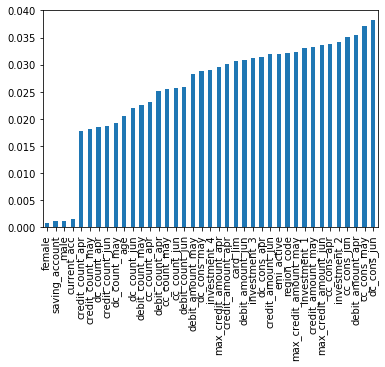

Features Selected by Random Forest method are:
 ['female', 'saving_account', 'male', 'current_acc', 'credit_count_apr', 'credit_count_may', 'dc_count_apr', 'credit_count_jun', 'dc_count_may', 'age', 'dc_count_jun', 'debit_count_may', 'cc_count_apr', 'debit_count_apr', 'cc_count_may', 'cc_count_jun', 'debit_count_jun', 'debit_amount_may', 'dc_cons_may', 'investment_4', 'max_credit_amount_apr', 'credit_amount_apr', 'card_lim', 'debit_amount_jun', 'investment_3', 'dc_cons_apr', 'credit_amount_jun', 'emi_active', 'region_code', 'max_credit_amount_may', 'investment_1', 'credit_amount_may', 'max_credit_amount_jun', 'cc_cons_apr', 'investment_2', 'cc_cons_jun', 'debit_amount_apr', 'cc_cons_may', 'dc_cons_jun']


In [57]:
def rfc_feature_selection(dataset,target):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3, random_state=42) 
    rfc = RandomForestRegressor(random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_importances = pd.Series(rfc.feature_importances_, index=dataset.columns).sort_values()
    rfc_importances.plot(kind='bar')
    plt.show()
    selected_features = list(rfc_importances.index)
    print('Features Selected by Random Forest method are:\n',selected_features)

rfc_feature_selection(X,y)

In [170]:
# X_selected= dataframe[['credit_count_apr', 'credit_count_may', 'dc_count_apr', 'credit_count_jun', 'dc_count_may', 'age', 'dc_count_jun', 'debit_count_may', 'cc_count_apr', 'debit_count_apr', 'cc_count_may', 'cc_count_jun', 'debit_count_jun', 'debit_amount_may', 'dc_cons_may', 'investment_4', 'max_credit_amount_apr', 'credit_amount_apr', 'card_lim', 'debit_amount_jun', 'investment_3', 'dc_cons_apr', 'credit_amount_jun', 'emi_active', 'region_code', 'max_credit_amount_may', 'investment_1', 'credit_amount_may', 'max_credit_amount_jun', 'cc_cons_apr', 'investment_2', 'cc_cons_jun', 'debit_amount_apr', 'cc_cons_may', 'dc_cons_jun']]
parameter_grid={'max_depth':[3,None],
           'max_features':[5,10,15,20,25,30],
           "bootstrap": [True, False]}
rf_clf=RandomForestRegressor(random_state=0)
X_train,X_test,y_train,y_test = train_test_split(X_selected,y,test_size=0.2,random_state=0)
X_train_s = x_scaler.fit_transform(X_train)
X_test_s = x_scaler.fit_transform(X_test)
y_train_s = y_scaler.fit_transform(y_train)
y_test_s = y_scaler.fit_transform(y_test)
grid_search = GridSearchCV(rf_clf,param_grid=parameter_grid,cv=5,n_jobs=10,verbose=20)
# random_forest_rmsle,y_pred_grid = run_model(X,y,grid_search)
grid_search.fit(X_train_s,y_train_s)
grid_pred=grid_search.predict(X_test_s)
# grid_roc_score=roc_auc_score(grid_pred,y_test)
grid_search_score=rmsle(y_test_s,grid_pred)
print(random_forest_rmsle)
# print('Best_parameters_are : ',grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:   12.3s
[Parallel(n_jobs=10)]: Done   2 tasks      | elapsed:   12.4s
[Parallel(n_jobs=10)]: Done   3 tasks      | elapsed:   12.5s
[Parallel(n_jobs=10)]: Done   4 tasks      | elapsed:   12.6s
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:   12.8s
[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:   13.3s
[Parallel(n_jobs=10)]: Done   7 tasks      | elapsed:   13.5s
[Parallel(n_jobs=10)]: Done   8 tasks      | elapsed:   13.7s
[Parallel(n_jobs=10)]: Done   9 tasks      | elapsed:   14.0s
[Parallel(n_jobs=10)]: Done  10 tasks      | elapsed:   14.0s
[Parallel(n_jobs=10)]: Done  11 tasks      | elapsed:   14.0s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   14.1s
[Parallel(n_jobs=10)]: Done  13 tasks      | elapsed:   14.2s
[Parallel(n_jobs=10)]: Done  14 tasks      | elapsed:   14.6s
[Parallel(n_jobs=10)]: Done  15 tasks      | elapsed:  

[0.17365573]


In [156]:
grid_pred_scaled = y_scaler.inverse_transform(grid_pred.reshape(-1,1))

In [157]:
grid_pred_scaled

array([[173.41459894],
       [176.41490982],
       [174.08655427],
       ...,
       [168.92469018],
       [172.8780401 ],
       [172.41725612]])

In [159]:
np.square(grid_pred_scaled)

array([[30072.62312522],
       [31122.22040818],
       [30306.12837632],
       ...,
       [28535.55095115],
       [29886.81674793],
       [29727.71020889]])